# TWITTER - BOT

Topic Name: Restaurant Recommendation and Reservation System

Group Name: R3

Members:

    Anjali Kshirsagar (002743547)

    Gayatri Kenkare (002743776)

    Snehal Padekar (002737903)

    Mahek Gangadia (002797094)

In [1]:
import tweepy #Library required for Twitter API
import csv
import pandas as pd
import os
import pymysql
import pandas as pd
import numpy as np

#!pip install wget
import wget
#import mysql-connector as sql

In [2]:
# #!pip install pip

# import pip
# package ='tweepy' #Just replace the package name with any package to install it.
# #pip.main(['install',package])

In [3]:
#defining twitter API keys
consumer_key = "7hgLSBuOr1CU5TRImIxHZQRPx"
consumer_secret = "oTiJsbivaS8CFvkeLpkeBP79KEsHyYm2Df9g3SDhc5XRJnd5zZ"
access_key = "1583542497069789186-ODvpZCnHlBs0e8gZCNLtAVR8dyy38B"
access_secret = "UxG6ZqSekW1aUUBBnvuujVm1n2jT26dK2ooyF2ppLSOlO"

In [4]:
#Creating an empty dataframe to store the information
tweets =pd.DataFrame(columns=["user_id","twitter_handle","user_name","profile_image_url","tweet_description","friends_count","followers_count","user_account_created"])
tweets_account =pd.DataFrame(columns=["user_id","twitter_handle"])


In [5]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)
outtweets_all =[] #list to store all tweets data
# outtweets_user = [] #list to store user related data
# outtweets_account = [] #list to store account related data
# outtweets_tweets = [] #list to store tweets related data
# outtweets_tags = []
# outtweets_url = []
# outtweets_mentions = []

In [6]:
for tweets in tweepy.Cursor(api.search,q="#restaurant",count=100, #The q variable holds the hashtag 
                           lang="en",
                           since="2017-04-19").items():
    #print(tweets)
    if(tweets.entities.get('media',[])) : #This condition appends only those tweets to the list which have image URL's
        media = tweets.entities.get('media')
        #outtweets_account.append([tweets.user.id_str,tweets.user.screen_name])
        #outtweets_user.append([tweets.user.id_str,tweets.user.name,tweets.user.screen_name,tweets.user.profile_image_url_https,tweets.user.description,tweets.user.friends_count,tweets.user.followers_count,tweets.user.created_at])
        outtweets_all.append([tweets.id_str,tweets.user.id_str,tweets.user.name,tweets.user.screen_name,tweets.user.profile_image_url_https,tweets.user.description,tweets.user.friends_count,tweets.user.followers_count,tweets.user.created_at,tweets.text,tweets.created_at,tweets.favorite_count,tweets.entities['hashtags'], tweets.entities['urls'],tweets.entities['user_mentions']])
        #outtweets_tweets.append([tweets.id_str,tweets.user.id_str,tweets.text,tweets.created_at,tweets.favorite_count])
        #outtweets_tags.append([tweets.user.id_str,tweet.hashtags, tweets.id_str ])
        #outtweets_url.append([tweets.id_str, tweets.user.id_str, tweets.url])
        #outtweets_mentions([tweets.id_str, tweets.user.id_str, tweets.entities['user_mentions']])
        #print(media[0]['media_url'])
print(outtweets_all)        

[['1591621373155221505', '1586146488786247681', 'Geodian', 'Geodian_', 'https://pbs.twimg.com/profile_images/1586146618998407171/ZPy4fflN_normal.png', 'Geographer on YouTube & TikTok', 32, 6, datetime.datetime(2022, 10, 29, 0, 3, 17), 'Biggest Fast Food Chain! #FastFood #Biggest #FastFoodChain #Restaurant #Viral #Trending https://t.co/ojvIP5IAJg', datetime.datetime(2022, 11, 13, 2, 38), 1, [{'text': 'FastFood', 'indices': [25, 34]}, {'text': 'Biggest', 'indices': [35, 43]}, {'text': 'FastFoodChain', 'indices': [44, 58]}, {'text': 'Restaurant', 'indices': [59, 70]}, {'text': 'Viral', 'indices': [71, 77]}, {'text': 'Trending', 'indices': [78, 87]}], [], []], ['1591597935841906688', '1571398410179313664', '29 Eatery & Bar', '29_Eatery_n_Bar', 'https://pbs.twimg.com/profile_images/1574683061727686658/iQgM9a-p_normal.jpg', '29 Eatery & Bar is a European restaurant rated by many diners as the best in Binh Duong.', 15, 0, datetime.datetime(2022, 9, 18, 7, 19, 33), 'Weekend 🥂😍   #BinhDuong #Fo

In [7]:
#insert data from list to pandas dataframe
tweetdf_all = pd.DataFrame(outtweets_all,columns = ["tweet_id","user_id","user_name","twitter_handle","profile_image_url","tweet_description","friends_count","followers_count","user_account_created","tweet_text","created_at","tweet_likes","tags","restaurant_url",'target_user'])
tweetdf_all.to_csv(r'C:\\Users\\Gayatri\\Downloads\\Web Scrapping\\data.csv')
tweetdf_all

,tweet_id,user_id,user_name,twitter_handle,profile_image_url,tweet_description,friends_count,followers_count,user_account_created,tweet_text,created_at,tweet_likes,tags,restaurant_url,target_user
0,1591621373155221505,1586146488786247681,Geodian,Geodian_,https://pbs.twimg.com/profile_images/158614661...,Geographer on YouTube & TikTok,32,6,2022-10-29 00:03:17,Biggest Fast Food Chain! #FastFood #Biggest #F...,2022-11-13 02:38:00,1,"[{'text': 'FastFood', 'indices': [25, 34]}, {'...",[],[]
1,1591597935841906688,1571398410179313664,29 Eatery & Bar,29_Eatery_n_Bar,https://pbs.twimg.com/profile_images/157468306...,29 Eatery & Bar is a European restaurant rated...,15,0,2022-09-18 07:19:33,Weekend 🥂😍 #BinhDuong #Food #Drink #29Eatery...,2022-11-13 01:04:53,0,"[{'text': 'BinhDuong', 'indices': [13, 23]}, {...",[],[]
2,1591561483896647680,1552446385747812352,AppyMeal,AppyMealApp,https://pbs.twimg.com/profile_images/155244646...,To-Go local marketplace,30,6,2022-07-28 00:10:41,Make sure you’re using the best app off the fi...,2022-11-12 22:40:02,1,"[{'text': 'food', 'indices': [80, 85]}, {'text...",[],[]
3,1591518222834356224,1426525878884847619,Lisa Farnworth,LisaFarnworth5,https://pbs.twimg.com/profile_images/142652602...,,1559,841,2021-08-14 12:47:32,RT @nvijaysairam: @elonmusk have a look at thi...,2022-11-12 19:48:07,0,"[{'text': 'indian', 'indices': [51, 58]}, {'te...",[],"[{'screen_name': 'nvijaysairam', 'name': 'n.vi..."
4,1591513731934334976,166053903,n.vijaysairam,nvijaysairam,https://pbs.twimg.com/profile_images/152335362...,#thuglife #peace what I need!!!!,411,46,2010-07-13 05:57:37,@elonmusk have a look at this!!! #indian 🤣🤣🤣 #...,2022-11-12 19:30:17,1,"[{'text': 'indian', 'indices': [33, 40]}, {'te...",[],"[{'screen_name': 'elonmusk', 'name': 'Elon Mus..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,1588515909412552705,1371780549589733383,Lens By ProPakistani,LENsByPP,https://pbs.twimg.com/profile_images/150364247...,Entertainment Website\n\nYour daily dose of ar...,92,104,2021-03-16 11:09:29,Read More: https://t.co/LGa98Rac4X\n#bellaciao...,2022-11-04 12:58:00,1,"[{'text': 'bellaciaocafe', 'indices': [35, 49]...","[{'url': 'https://t.co/LGa98Rac4X', 'expanded_...",[]
235,1588496145747443712,1552545565426196486,Vitale Restaurant | Bar,vitaleistanbul,https://pbs.twimg.com/profile_images/155254561...,Welcome to Istanbul's newest and most beautifu...,0,0,2022-07-28 06:44:54,Vitale's indoor hall will help you make great ...,2022-11-04 11:39:28,0,"[{'text': 'vitalerestaurant', 'indices': [57, ...",[],[]
236,1588495182613598209,1559552248576868355,Fashionking777,Fashionking7771,https://pbs.twimg.com/profile_images/156020252...,"I'm single GAY man ,hip hop dancer , love sexy...",395,81,2022-08-16 14:47:07,#breakfastbuffet #espressomachine #coffee\n#re...,2022-11-04 11:35:39,0,"[{'text': 'breakfastbuffet', 'indices': [0, 16...",[],[]
237,1588485210286555138,1325703217213284352,The Happy Smiley,The_happysmiley,https://pbs.twimg.com/profile_images/133403187...,Welcome to The Happy Smiley store! All you nee...,0,6,2020-11-09 07:34:51,#restaurant #chefspick Jingdezhen Classic Cera...,2022-11-04 10:56:01,0,"[{'text': 'restaurant', 'indices': [0, 11]}, {...","[{'url': 'https://t.co/2SHcZPcnNi', 'expanded_...",[]


In [8]:
# user_table dataframe
tweetdf_user = tweetdf_all[["user_id","twitter_handle","user_name","profile_image_url","tweet_description","friends_count","followers_count","user_account_created"]]
tweetdf_user = tweetdf_user.drop_duplicates('user_id') #drop duplicates
tweetdf_user

,user_id,twitter_handle,user_name,profile_image_url,tweet_description,friends_count,followers_count,user_account_created
0,1586146488786247681,Geodian_,Geodian,https://pbs.twimg.com/profile_images/158614661...,Geographer on YouTube & TikTok,32,6,2022-10-29 00:03:17
1,1571398410179313664,29_Eatery_n_Bar,29 Eatery & Bar,https://pbs.twimg.com/profile_images/157468306...,29 Eatery & Bar is a European restaurant rated...,15,0,2022-09-18 07:19:33
2,1552446385747812352,AppyMealApp,AppyMeal,https://pbs.twimg.com/profile_images/155244646...,To-Go local marketplace,30,6,2022-07-28 00:10:41
3,1426525878884847619,LisaFarnworth5,Lisa Farnworth,https://pbs.twimg.com/profile_images/142652602...,,1559,841,2021-08-14 12:47:32
4,166053903,nvijaysairam,n.vijaysairam,https://pbs.twimg.com/profile_images/152335362...,#thuglife #peace what I need!!!!,411,46,2010-07-13 05:57:37
...,...,...,...,...,...,...,...,...
234,1371780549589733383,LENsByPP,Lens By ProPakistani,https://pbs.twimg.com/profile_images/150364247...,Entertainment Website\n\nYour daily dose of ar...,92,104,2021-03-16 11:09:29
235,1552545565426196486,vitaleistanbul,Vitale Restaurant | Bar,https://pbs.twimg.com/profile_images/155254561...,Welcome to Istanbul's newest and most beautifu...,0,0,2022-07-28 06:44:54
236,1559552248576868355,Fashionking7771,Fashionking777,https://pbs.twimg.com/profile_images/156020252...,"I'm single GAY man ,hip hop dancer , love sexy...",395,81,2022-08-16 14:47:07
237,1325703217213284352,The_happysmiley,The Happy Smiley,https://pbs.twimg.com/profile_images/133403187...,Welcome to The Happy Smiley store! All you nee...,0,6,2020-11-09 07:34:51


In [9]:
#account table dataframe
tweetdf_account = tweetdf_user[['user_id','twitter_handle']]
tweetdf_account['user_password']='XXXXXX'
tweetdf_account.index=np.arange(1, len(tweetdf_account) + 1)
tweetdf_account['account_id']=tweetdf_account.index
tweetdf_account=tweetdf_account[['account_id','user_id','twitter_handle','user_password']]
tweetdf_account

C:\Users\Gayatri\AppData\Local\Temp\ipykernel_6148\311185408.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetdf_account['user_password']='XXXXXX'
C:\Users\Gayatri\AppData\Local\Temp\ipykernel_6148\311185408.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweetdf_account['account_id']=tweetdf_account.index


,account_id,user_id,twitter_handle,user_password
1,1,1586146488786247681,Geodian_,XXXXXX
2,2,1571398410179313664,29_Eatery_n_Bar,XXXXXX
3,3,1552446385747812352,AppyMealApp,XXXXXX
4,4,1426525878884847619,LisaFarnworth5,XXXXXX
5,5,166053903,nvijaysairam,XXXXXX
...,...,...,...,...
171,171,1371780549589733383,LENsByPP,XXXXXX
172,172,1552545565426196486,vitaleistanbul,XXXXXX
173,173,1559552248576868355,Fashionking7771,XXXXXX
174,174,1325703217213284352,The_happysmiley,XXXXXX


In [10]:
#tweets table dataframe
tweetdf_tweet = tweetdf_all[["tweet_id","user_id","tweet_text","created_at","tweet_likes"]]
tweetdf_tweet = tweetdf_tweet.drop_duplicates('tweet_id')
tweetdf_tweet

,tweet_id,user_id,tweet_text,created_at,tweet_likes
0,1591621373155221505,1586146488786247681,Biggest Fast Food Chain! #FastFood #Biggest #F...,2022-11-13 02:38:00,1
1,1591597935841906688,1571398410179313664,Weekend 🥂😍 #BinhDuong #Food #Drink #29Eatery...,2022-11-13 01:04:53,0
2,1591561483896647680,1552446385747812352,Make sure you’re using the best app off the fi...,2022-11-12 22:40:02,1
3,1591518222834356224,1426525878884847619,RT @nvijaysairam: @elonmusk have a look at thi...,2022-11-12 19:48:07,0
4,1591513731934334976,166053903,@elonmusk have a look at this!!! #indian 🤣🤣🤣 #...,2022-11-12 19:30:17,1
...,...,...,...,...,...
234,1588515909412552705,1371780549589733383,Read More: https://t.co/LGa98Rac4X\n#bellaciao...,2022-11-04 12:58:00,1
235,1588496145747443712,1552545565426196486,Vitale's indoor hall will help you make great ...,2022-11-04 11:39:28,0
236,1588495182613598209,1559552248576868355,#breakfastbuffet #espressomachine #coffee\n#re...,2022-11-04 11:35:39,0
237,1588485210286555138,1325703217213284352,#restaurant #chefspick Jingdezhen Classic Cera...,2022-11-04 10:56:01,0


In [11]:
#tweet_tags table dataframe
tweetdf_tags = tweetdf_all[["tweet_id","user_id","tags"]]
new_tags =pd.DataFrame(columns=["tweet_id","user_id","tags"])

for index,row in tweetdf_tags.iterrows():
    for values in row['tags']:
        temp=[row['tweet_id'], row['user_id'],values['text']]
        new_tags.loc[len(new_tags)] = temp
new_tags.index=np.arange(1, len(new_tags) + 1)
new_tags['tag_id']=new_tags.index
new_tags=new_tags[['tag_id','user_id','tags','tweet_id']]
new_tags

,tag_id,user_id,tags,tweet_id
1,1,1586146488786247681,FastFood,1591621373155221505
2,2,1586146488786247681,Biggest,1591621373155221505
3,3,1586146488786247681,FastFoodChain,1591621373155221505
4,4,1586146488786247681,Restaurant,1591621373155221505
5,5,1586146488786247681,Viral,1591621373155221505
...,...,...,...,...
988,988,1559552248576868355,nyc,1588495182613598209
989,989,1325703217213284352,restaurant,1588485210286555138
990,990,1325703217213284352,chefspick,1588485210286555138
991,991,1357513391456272384,restaurant,1588456361301622790


In [12]:
#tweet_url table dataframe
tweetdf_url = tweetdf_all[["tweet_id","user_id","restaurant_url"]]
new_url =pd.DataFrame(columns=["tweet_id","user_id","restaurant_url"])
for index,row in tweetdf_url.iterrows():
    if len(row['restaurant_url'])!=0:
        temp=[row['tweet_id'], row['user_id'],row['restaurant_url'][0]['url']]
        new_url.loc[len(new_url)] = temp
new_url.index=np.arange(1, len(new_url) + 1)
new_url['url_id']=new_url.index
new_url=new_url[['url_id','tweet_id','user_id','restaurant_url']]
new_url        

,url_id,tweet_id,user_id,restaurant_url
1,1,1591491108458168322,1577361386488856576,https://t.co/BMsVEyrlBy
2,2,1591250959350788097,856975240630501380,https://t.co/SicmjDPn8L
3,3,1591229492668018689,1520807222497927170,https://t.co/SicmjDPn8L
4,4,1591184328926846977,1001526577476218880,https://t.co/SicmjDPn8L
5,5,1591178653626667009,152386261,https://t.co/SicmjDPn8L
6,6,1591167889457172480,1386211055760674816,https://t.co/uYHe8Mp9Gs
7,7,1591155487097380864,18090409,https://t.co/SicmjDPn8L
8,8,1591147554506305536,23659017,https://t.co/PjMXCWU4Kl
9,9,1591147442854330368,18970117,https://t.co/BRbBoUIler
10,10,1591141826190344192,206560051,https://t.co/SicmjDPn8L


In [13]:
#Tweet_mention table dataframe
tweetdf_mentions = tweetdf_all[["tweet_id","user_id","target_user"]]
new_mentions =pd.DataFrame(columns=["tweet_id","user_id","target_user"])
            
for index,row in tweetdf_mentions.iterrows():
    if row['target_user']!=None:
        if len(row['target_user'])!=0:
            for values in row['target_user']:
                temp=[row['tweet_id'], row['user_id'],values['screen_name']]
                new_mentions.loc[len(new_mentions)] = temp
new_mentions.index=np.arange(1, len(new_mentions) + 1)
new_mentions['mention_id']=new_mentions.index
new_mentions=new_mentions[['mention_id','tweet_id','user_id','target_user']]
new_mentions

,mention_id,tweet_id,user_id,target_user
1,1,1591518222834356224,1426525878884847619,nvijaysairam
2,2,1591518222834356224,1426525878884847619,elonmusk
3,3,1591513731934334976,166053903,elonmusk
4,4,1591250959350788097,856975240630501380,shawnpwalchef
5,5,1591250959350788097,856975240630501380,CaliComfort
...,...,...,...,...
112,112,1588610839241785345,27957934,EatThisNotThat
113,113,1588605994472456194,206560051,CaliComfort
114,114,1588570212915621888,1548952739773927424,barakuda_v
115,115,1588565568176750593,27957934,ModRestManage


In [14]:
#connection between python and mysql workbench
conn=pymysql.connect(host='localhost',port=int(3306),user='root',passwd='root',db='rrr')
cursor= conn.cursor()

In [15]:
#Deleting existing data in User Table:- 
cursor.execute("DELETE FROM rrr.User")
conn.commit()

#Inserting data in User Table:- 
for index,row in tweetdf_user.iterrows():
    cursor.execute("INSERT INTO User values (%s,%s,%s,%s,%s,%s,%s,%s)", (int(row['user_id']),row['twitter_handle'],row['user_name'],row['profile_image_url'],row['tweet_description'],row['friends_count'],row['followers_count'],row['user_account_created']))
conn.commit()

cursor.execute("SELECT * from User")
records=cursor.fetchall()
print(records)
conn.commit()

((14275259.0, 'CWDaly', 'Clay Ⓥ 🌕🌖🌗🌘🌑🌒🌓🌔🌕', 'https://pbs.twimg.com/profile_images/1514593047279022081/7kSXOSD__normal.jpg', 'Co-host of Cybrcast (@cybrcast), BubbleSort (@bubblesortshow), & BubbleSort TV (@bubblesortTV). Solo podcast Through My Lens @withclaydaly & @Harm_Less', 323, 559, datetime.datetime(2008, 4, 1, 14, 55, 20)), (17731977.0, 'axekohli', 'Akshay Kohli', 'https://pbs.twimg.com/profile_images/1370771267859533827/7jIw9M1q_normal.jpg', 'Nothing to write home about! Here for information, news, views and knowledge.', 1078, 95, datetime.datetime(2008, 11, 29, 10, 15, 51)), (18090409.0, 'CaliComfort', 'Cali BBQ', 'https://pbs.twimg.com/profile_images/1004065736342454272/WDy_itPd_normal.jpg', '🍖 San Diego’s Amazon Prime of BBQ 🎥 Podcasts @calibbqmedia ❤️ Founder @shawnpwalchef 📲 Buy BBQ online, anytime', 2850, 3283, datetime.datetime(2008, 12, 13, 0, 55, 22)), (18882079.0, 'jfeehan888', 'Jane Feehan', 'https://pbs.twimg.com/profile_images/1578858745249107968/RLjp7MYi_normal.jp

USER TABLE OUTPUT:
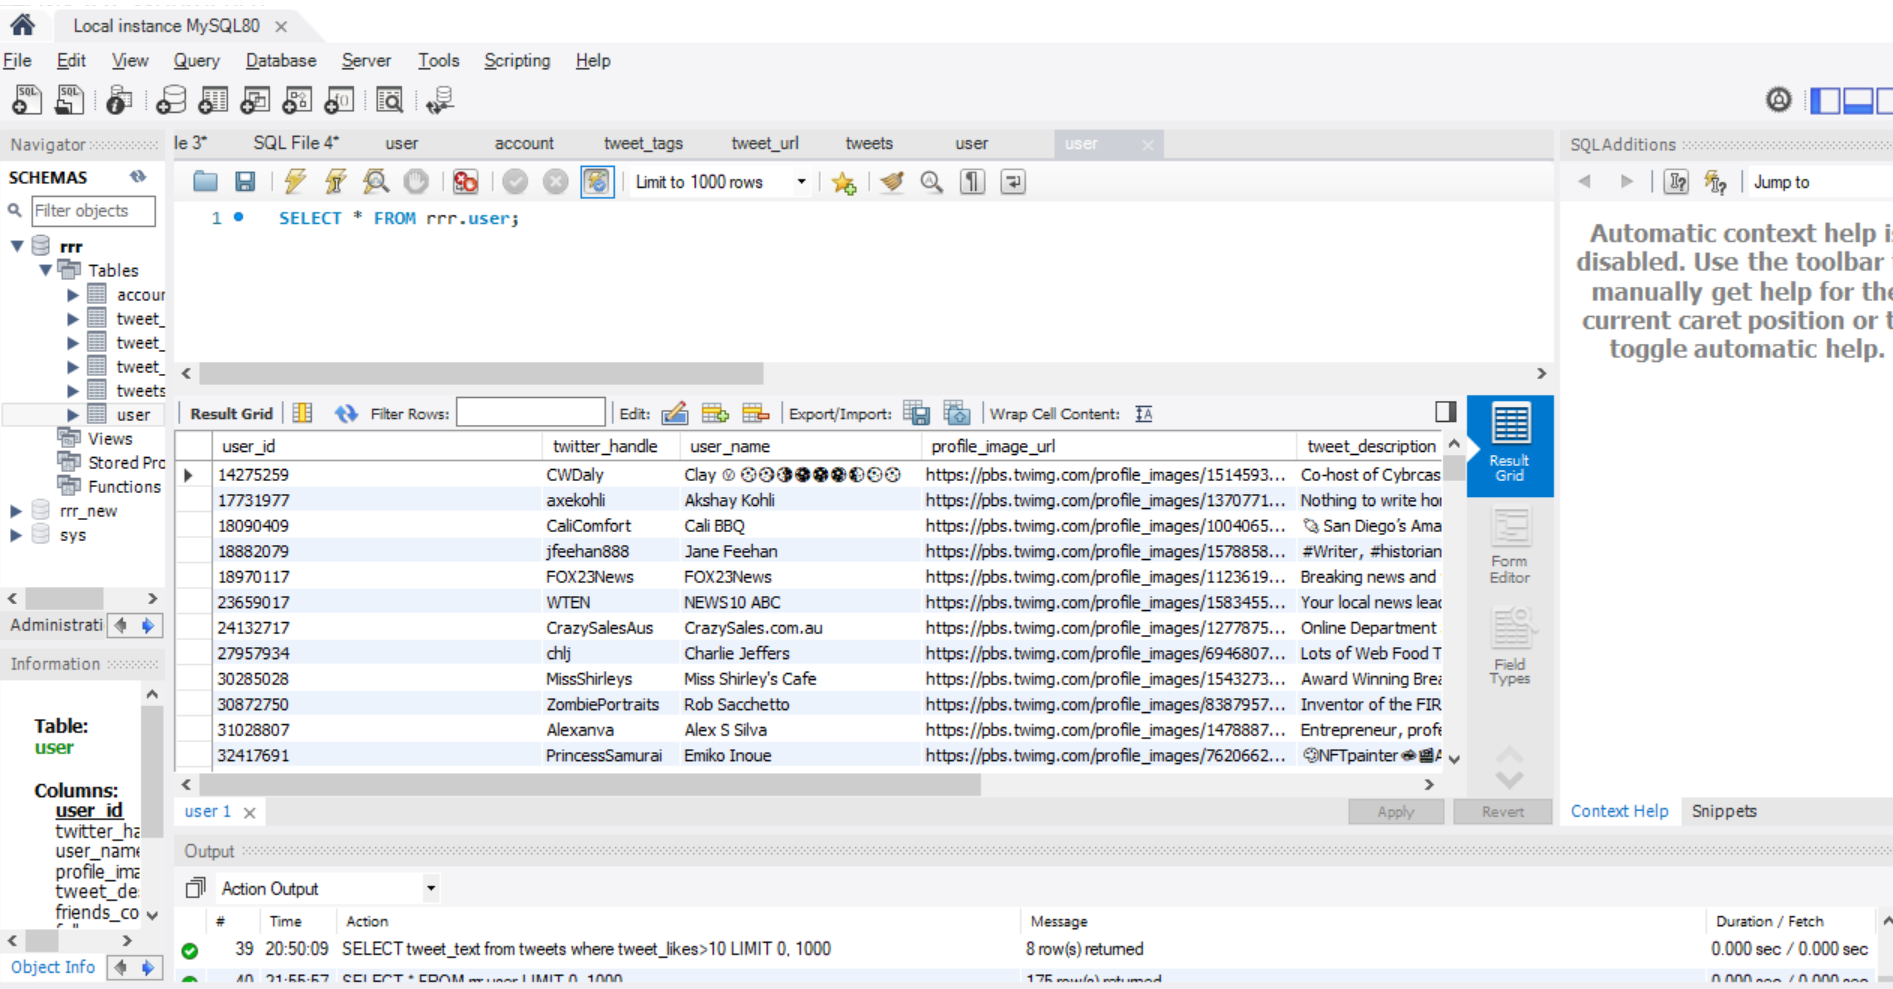

In [16]:
#Deleting existing data from account table
cursor.execute("DELETE FROM rrr.account")
conn.commit()

#Inserting data into account table
for index,row in tweetdf_account.iterrows():
    cursor.execute("INSERT INTO account values (%s,%s,%s,%s)", (int(row['account_id']),row['user_id'],row['twitter_handle'],row['user_password']))
conn.commit()
cursor.execute("SELECT * from account")
records=cursor.fetchall()
print(records)
conn.commit()

(('1', 1.5861464887862477e+18, 'Geodian_', 'XXXXXX'), ('10', 148354107.0, 'THEDIAL', 'XXXXXX'), ('100', 1.2809851880094802e+18, 'QwasiBerry', 'XXXXXX'), ('101', 7.551488497238671e+17, 'ammawith2ms', 'XXXXXX'), ('102', 1.1515566599757947e+18, 'AzizAnumd3', 'XXXXXX'), ('103', 1.0224018604797256e+18, 'jibrilkhalifa12', 'XXXXXX'), ('104', 1.587080316572795e+18, 'QuameAgyei1', 'XXXXXX'), ('105', 1.0412808466305516e+18, 'danielquainoo_', 'XXXXXX'), ('106', 1.3779859426701517e+18, 'Tumtum__broni', 'XXXXXX'), ('107', 1.5831491040870482e+18, 'Derrick278948', 'XXXXXX'), ('108', 1.5508021795182428e+18, 'thisismanuell', 'XXXXXX'), ('109', 1.3494806939030856e+18, 'EXPERIENCE_98', 'XXXXXX'), ('11', 322673778.0, 'judith_walker1', 'XXXXXX'), ('110', 1.4540345523729285e+18, 'Ankamah09488347', 'XXXXXX'), ('111', 1.373738913655894e+18, 'deejay_barony', 'XXXXXX'), ('112', 1.2132863327614362e+18, 'Berma_Yaw_', 'XXXXXX'), ('113', 1.3044930966469632e+18, 'ne_ober', 'XXXXXX'), ('114', 1.1451375983792824e+18, 

ACCOUNT TABLE OUTPUT:

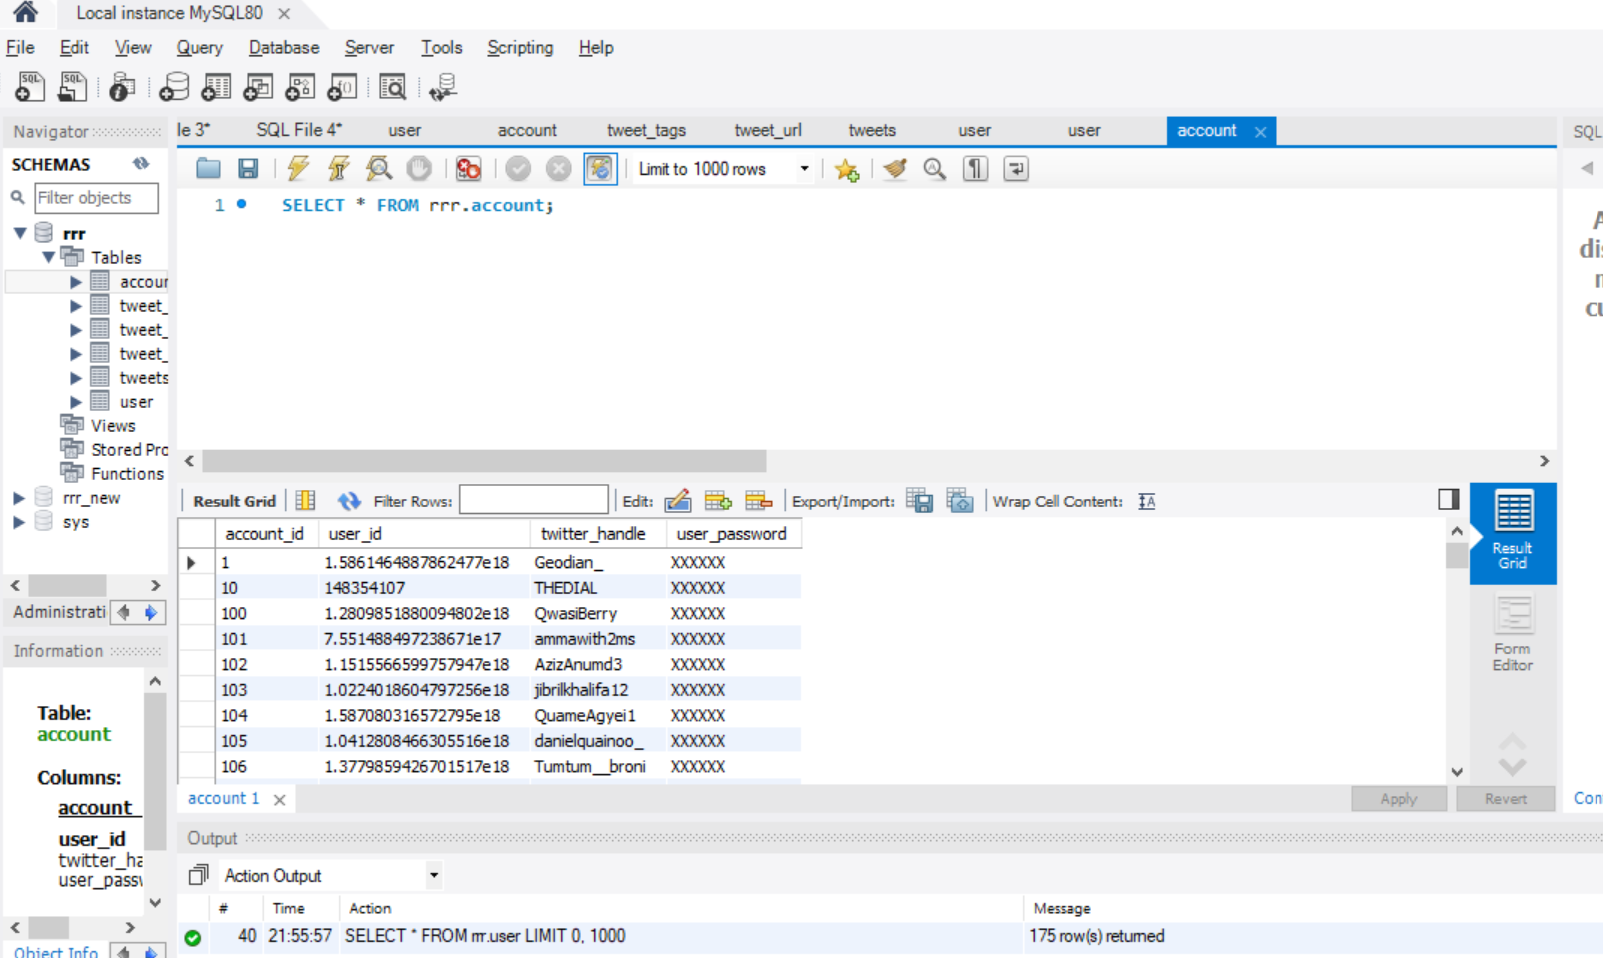

In [17]:
#Deleting data from Tweets table
cursor.execute("DELETE FROM rrr.Tweets")
conn.commit()

#Inserting data into Tweets table
for index,row in tweetdf_tweet.iterrows():
    cursor.execute("INSERT INTO Tweets values (%s,%s,%s,%s,%s)", (int(row['tweet_id']),row['user_id'],row['tweet_text'],row['created_at'],row['tweet_likes']))
conn.commit()
cursor.execute("SELECT * from Tweets")
records=cursor.fetchall()
print(records)
conn.commit()

((1.5884563613016228e+18, 1.3575133914562724e+18, 'Creative Dinosaur Shaped Eco-Friendly Plastic Cookie Cutters Set #restaurant #chefspick https://t.co/JETK1GEvF7 https://t.co/L7subvoMmz', datetime.datetime(2022, 11, 4, 9, 1, 23), 0), (1.5884852102865551e+18, 1.3257032172132844e+18, '#restaurant #chefspick Jingdezhen Classic Ceramic Vase https://t.co/2SHcZPcnNi https://t.co/5YwP7zq5ds', datetime.datetime(2022, 11, 4, 10, 56, 1), 0), (1.5884951826135982e+18, 1.5595522485768684e+18, '#breakfastbuffet #espressomachine #coffee\n#restaurant favorite #breakfast spot #nyc https://t.co/qCHPNGlmWE', datetime.datetime(2022, 11, 4, 11, 35, 39), 0), (1.5884961457474437e+18, 1.5525455654261965e+18, "Vitale's indoor hall will help you make great memories.\n\n#vitalerestaurant #istanbul #cityguide #mustsee #restaurant https://t.co/8YmznwHEdX", datetime.datetime(2022, 11, 4, 11, 39, 28), 0), (1.5885159094125527e+18, 1.3717805495897334e+18, 'Read More: https://t.co/LGa98Rac4X\n#bellaciaocafe #bellaciao

TWEETS TABLE OUTPUT:

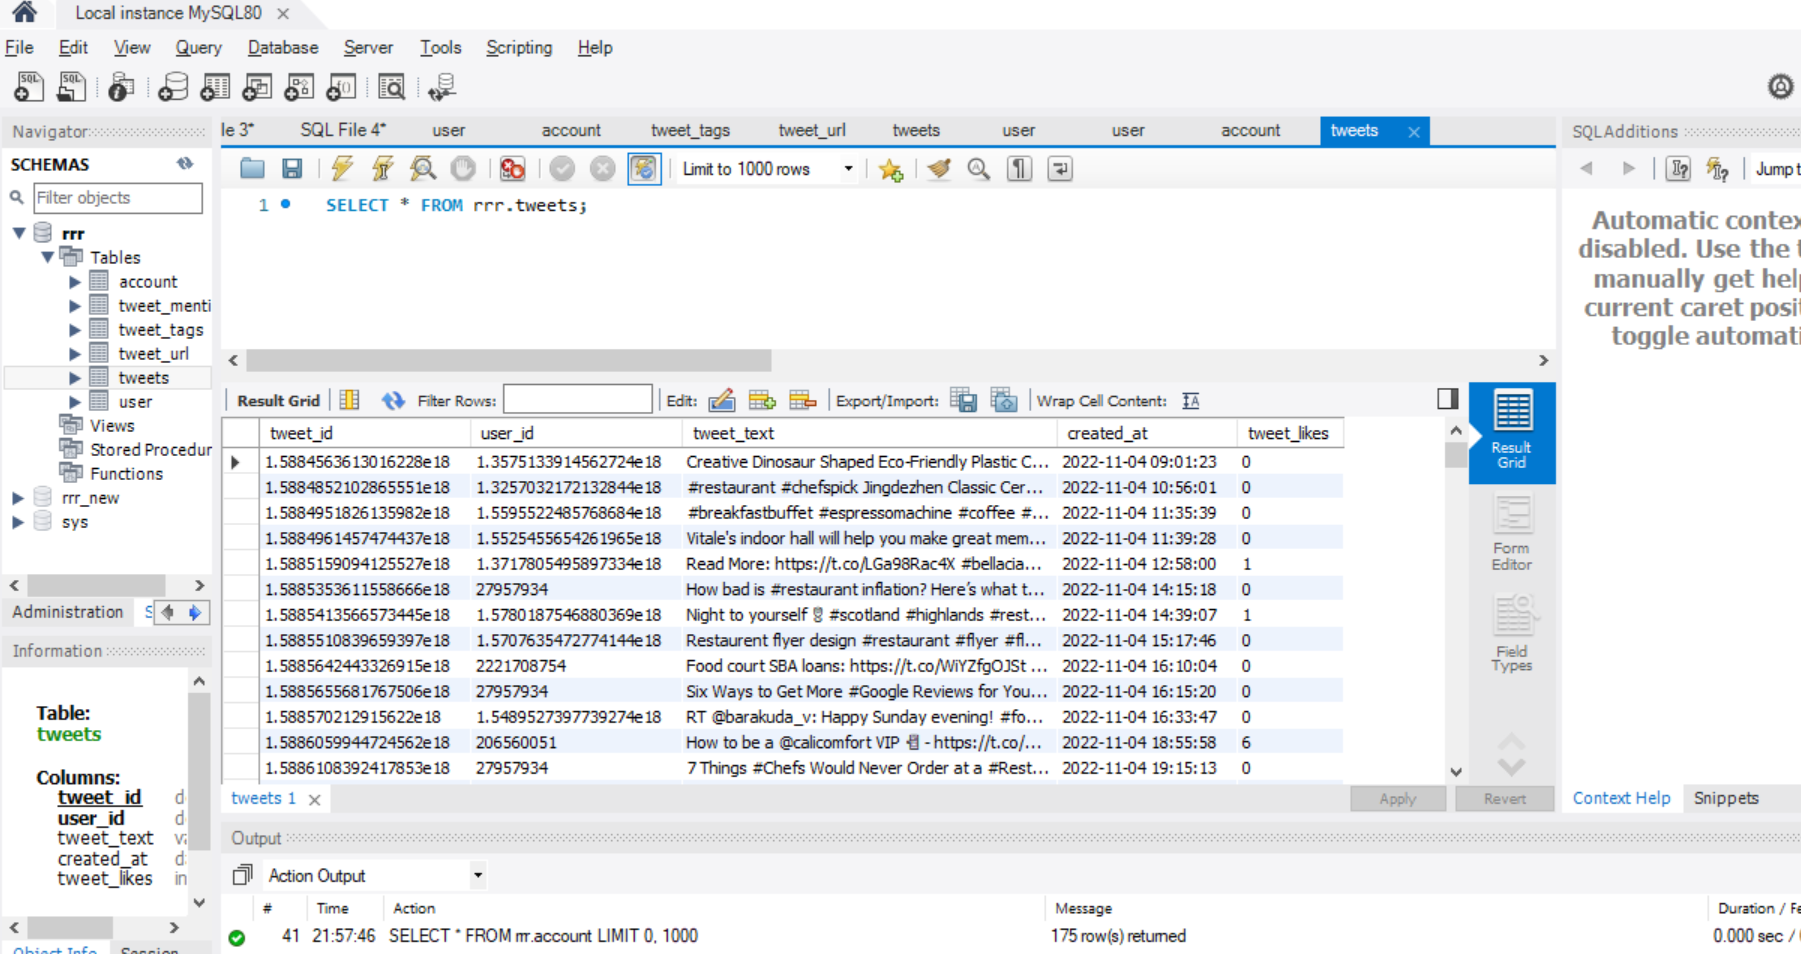

In [18]:
#Deleting data from tweet_tags table
cursor.execute("DELETE FROM rrr.Tweet_Tags")
conn.commit()

#Inserting data into Tweet_tags table
for index,row in new_tags.iterrows():
    cursor.execute("INSERT INTO Tweet_Tags values (%s,%s,%s,%s)", (int(row['tag_id']),row['user_id'],row['tags'],row['tweet_id']))
conn.commit()
cursor.execute("SELECT * from Tweet_Tags")
records=cursor.fetchall()
print(records)
conn.commit()

((1.0, 1.5861464887862477e+18, 'FastFood', 1.5916213731552215e+18), (2.0, 1.5861464887862477e+18, 'Biggest', 1.5916213731552215e+18), (3.0, 1.5861464887862477e+18, 'FastFoodChain', 1.5916213731552215e+18), (4.0, 1.5861464887862477e+18, 'Restaurant', 1.5916213731552215e+18), (5.0, 1.5861464887862477e+18, 'Viral', 1.5916213731552215e+18), (6.0, 1.5861464887862477e+18, 'Trending', 1.5916213731552215e+18), (7.0, 1.5713984101793137e+18, 'BinhDuong', 1.5915979358419067e+18), (8.0, 1.5713984101793137e+18, 'Food', 1.5915979358419067e+18), (9.0, 1.5713984101793137e+18, 'Drink', 1.5915979358419067e+18), (10.0, 1.5713984101793137e+18, '29Eatery', 1.5915979358419067e+18), (11.0, 1.5713984101793137e+18, 'pizza', 1.5915979358419067e+18), (12.0, 1.5713984101793137e+18, 'pasta', 1.5915979358419067e+18), (13.0, 1.5713984101793137e+18, 'tapas', 1.5915979358419067e+18), (14.0, 1.5713984101793137e+18, 'steak', 1.5915979358419067e+18), (15.0, 1.5713984101793137e+18, 'Restaurant', 1.5915979358419067e+18), (

TWEET_TAGS TABLE OUTPUT:

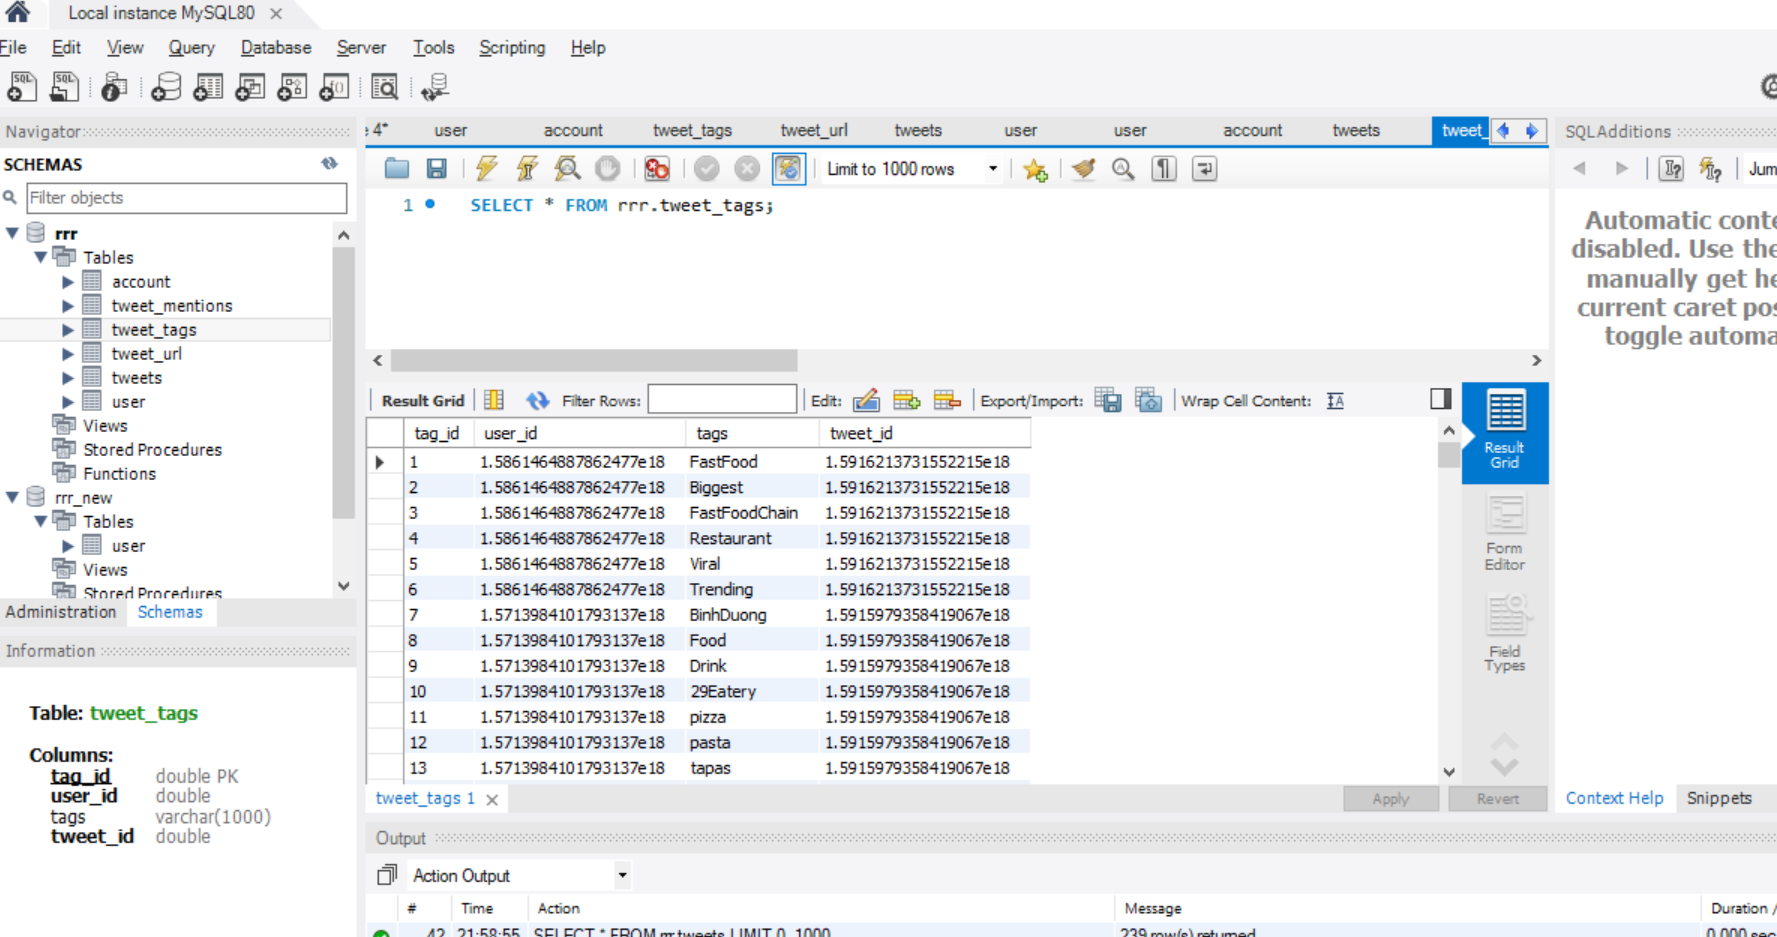

In [19]:
#Deleting data from Tweet_Url table
cursor.execute("DELETE FROM rrr.Tweet_Url")
conn.commit()

#Inserting data into Tweet_url table
for index,row in new_url.iterrows():
    cursor.execute("INSERT INTO Tweet_Url values (%s,%s,%s,%s)", (int(row['url_id']),row['tweet_id'],row['user_id'],row['restaurant_url']))
conn.commit()
cursor.execute("SELECT * from Tweet_Url")
records=cursor.fetchall()
print(records)
conn.commit()

((1.0, 1.5914911084581683e+18, 1.5773613864888566e+18, 'https://t.co/BMsVEyrlBy'), (2.0, 1.591250959350788e+18, 8.569752406305014e+17, 'https://t.co/SicmjDPn8L'), (3.0, 1.5912294926680187e+18, 1.5208072224979272e+18, 'https://t.co/SicmjDPn8L'), (4.0, 1.591184328926847e+18, 1.0015265774762189e+18, 'https://t.co/SicmjDPn8L'), (5.0, 1.591178653626667e+18, 152386261.0, 'https://t.co/SicmjDPn8L'), (6.0, 1.5911678894571725e+18, 1.3862110557606748e+18, 'https://t.co/uYHe8Mp9Gs'), (7.0, 1.5911554870973809e+18, 18090409.0, 'https://t.co/SicmjDPn8L'), (8.0, 1.5911475545063055e+18, 23659017.0, 'https://t.co/PjMXCWU4Kl'), (9.0, 1.5911474428543304e+18, 18970117.0, 'https://t.co/BRbBoUIler'), (10.0, 1.5911418261903442e+18, 206560051.0, 'https://t.co/SicmjDPn8L'), (11.0, 1.5910720964567409e+18, 27957934.0, 'https://t.co/NK9b0leBMR'), (12.0, 1.5907700702964326e+18, 27957934.0, 'https://t.co/v5wEqIWtlQ'), (13.0, 1.590764543340417e+18, 51983196.0, 'https://t.co/cKh5qSGXIj'), (14.0, 1.5907549954605097e+1

TWEET_URL TABLE OUTPUT:

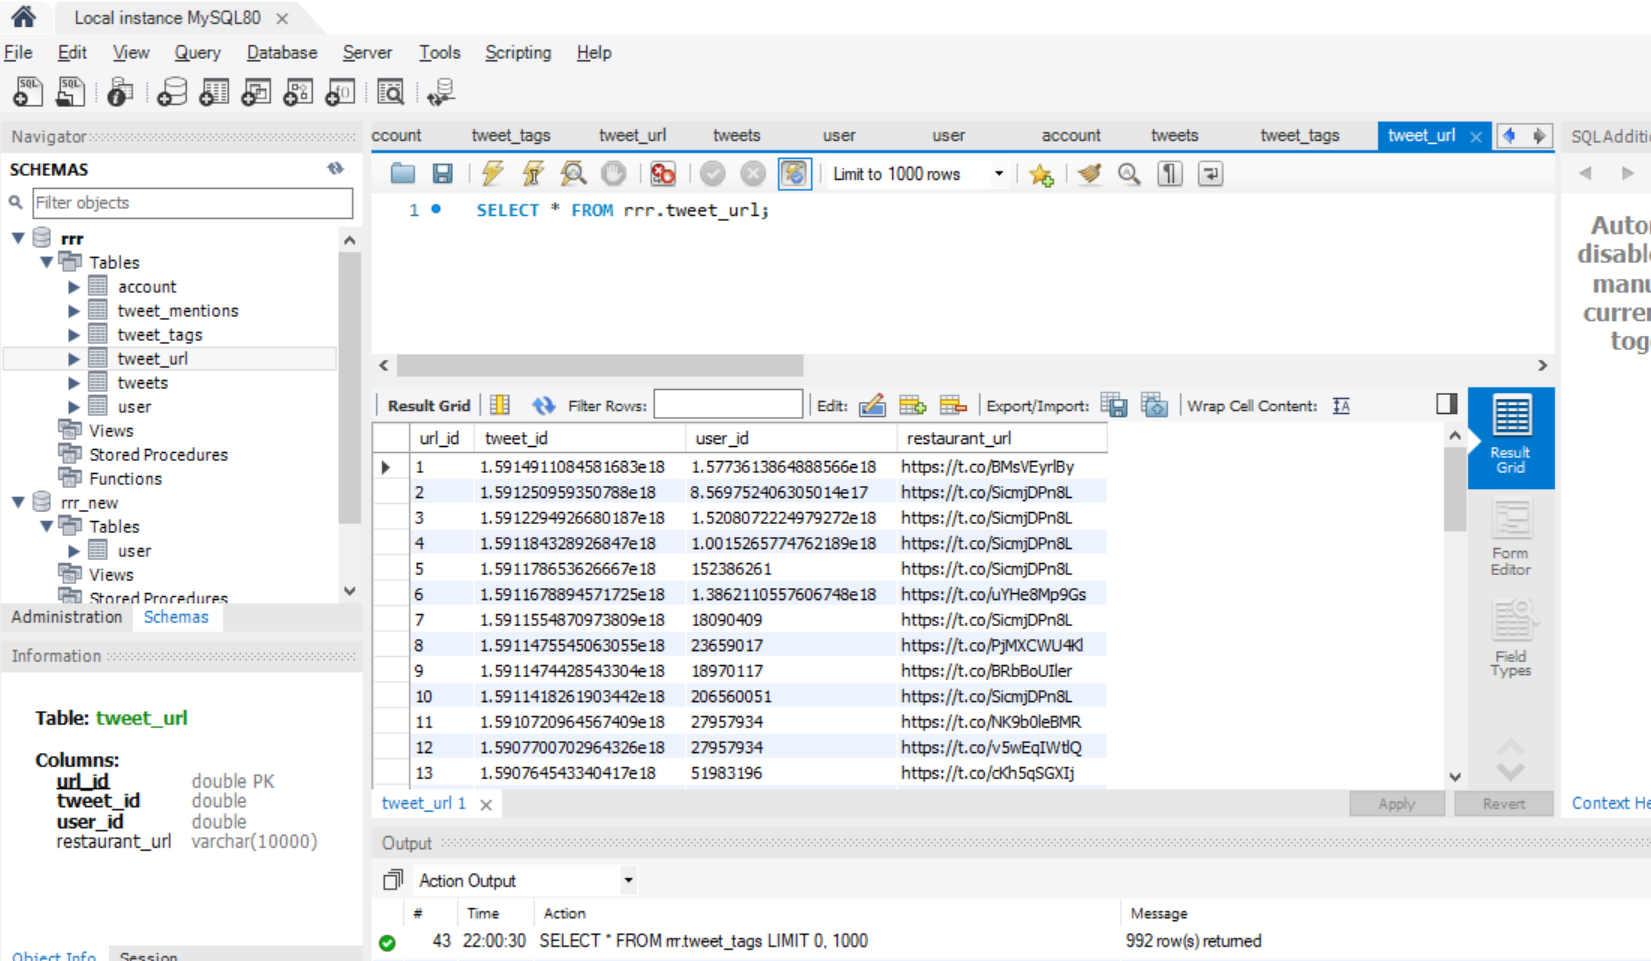

In [20]:
#Deleting data from Tweet_Mentions table
cursor.execute("DELETE FROM rrr.Tweet_Mentions")
conn.commit()

#Inserting data into Tweet_Mentions table
for index,row in new_mentions.iterrows():
    cursor.execute("INSERT INTO Tweet_Mentions values (%s,%s,%s,%s)", (int(row['mention_id']),row['tweet_id'],row['user_id'],row['target_user']))
conn.commit()
cursor.execute("SELECT * from Tweet_Mentions")
records=cursor.fetchall()
print(records)
conn.commit()

((1.0, 1.5915182228343562e+18, 1.4265258788848476e+18, 'nvijaysairam'), (2.0, 1.5915182228343562e+18, 1.4265258788848476e+18, 'elonmusk'), (3.0, 1.591513731934335e+18, 166053903.0, 'elonmusk'), (4.0, 1.591250959350788e+18, 8.569752406305014e+17, 'shawnpwalchef'), (5.0, 1.591250959350788e+18, 8.569752406305014e+17, 'CaliComfort'), (6.0, 1.5912294926680187e+18, 1.5208072224979272e+18, 'shawnpwalchef'), (7.0, 1.5912294926680187e+18, 1.5208072224979272e+18, 'CaliComfort'), (8.0, 1.5912229871387648e+18, 3309191992.0, 'chaigreen1823'), (9.0, 1.5912044671183299e+18, 3309191992.0, 'chaigreen1823'), (10.0, 1.5912044671183299e+18, 3309191992.0, 'BootcampMediaUK'), (11.0, 1.591184328926847e+18, 1.0015265774762189e+18, 'shawnpwalchef'), (12.0, 1.591184328926847e+18, 1.0015265774762189e+18, 'CaliComfort'), (13.0, 1.591178653626667e+18, 152386261.0, 'shawnpwalchef'), (14.0, 1.591178653626667e+18, 152386261.0, 'CaliComfort'), (15.0, 1.5911554870973809e+18, 18090409.0, 'shawnpwalchef'), (16.0, 1.59115

TWEET_MENTIONS TABLE OUTPUT:

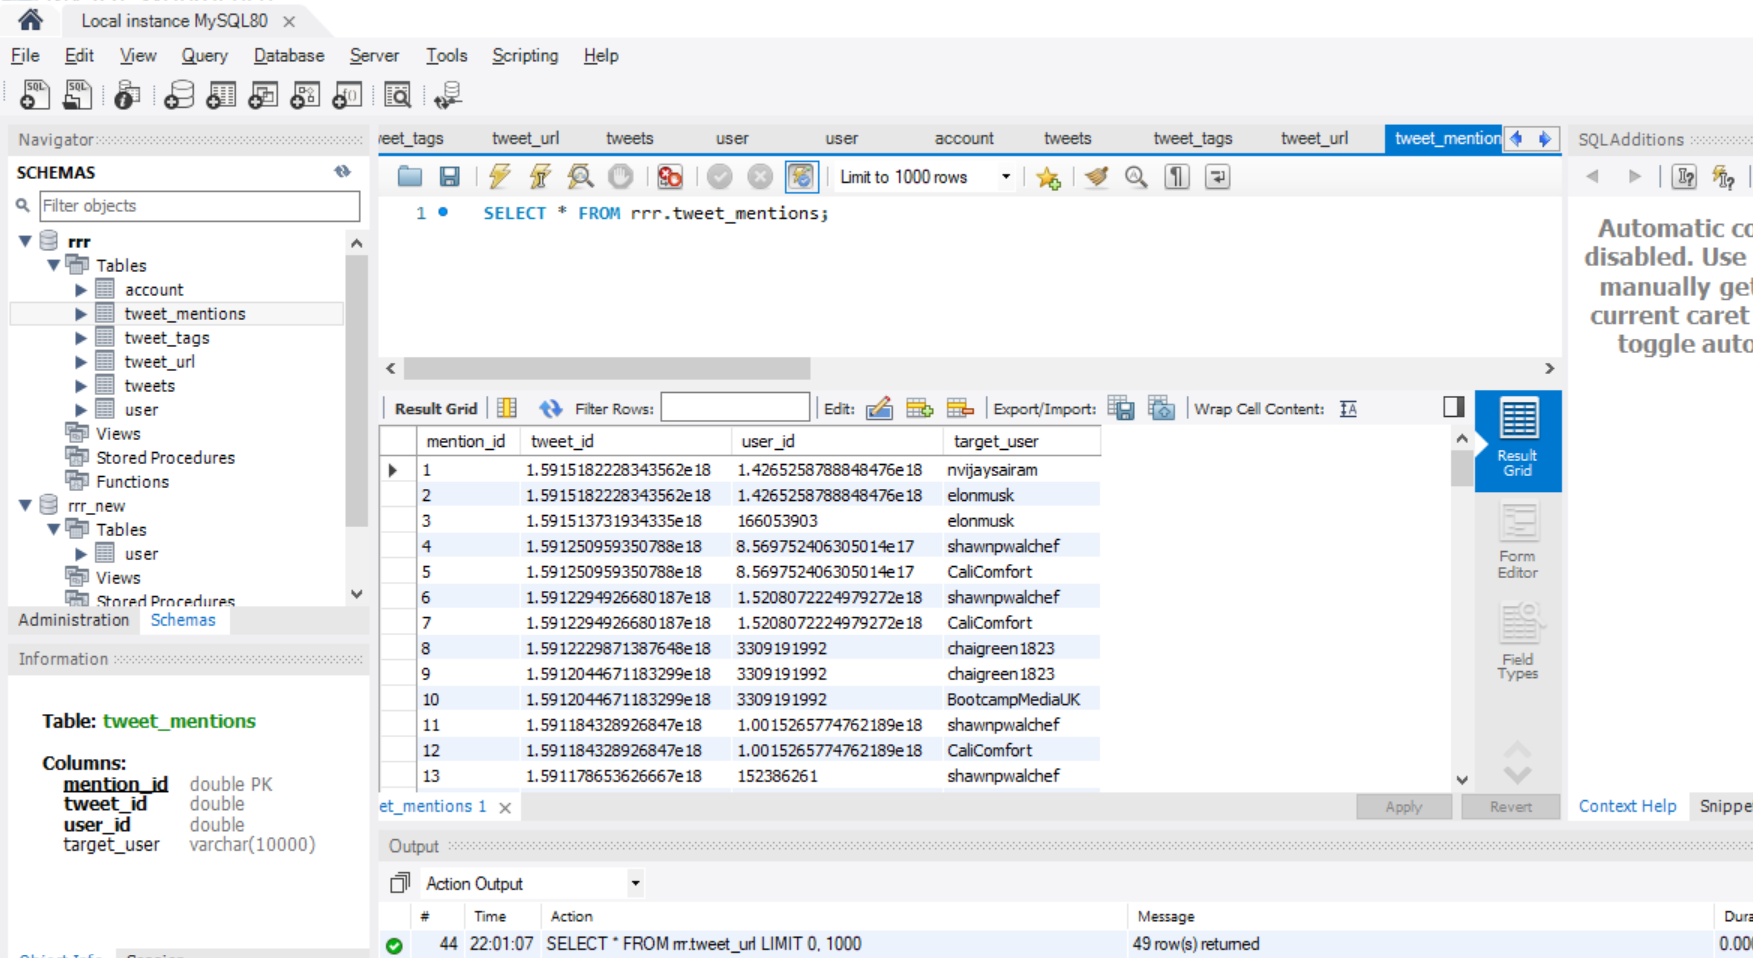